In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split())) #map()函数返回一个迭代器
        xs, ys = zip(*xys) #将迭代器xys中的元素打包成一个个元组，返回有这些元组构成的列表
        return np.asarray(xs), np.asarray(ys)  #返回的是一个元组，原组内有两个元素

In [2]:
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

In [3]:
def gaussian_basis(x, feature_num=5):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    #==========
    ret = None
    return ret

In [4]:
def multinomial_basis(x, feature_num=15):
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    feat = [x]
    for i in range(2, feature_num+1):
        feat.append(x**i)
    #此时feat为长度为feature_num的列表，列表元素为x**i,类型为array。
    ret = np.concatenate(feat, axis=1)
    #feat看作是（x,x**2,x**3,...x**N) 拼接的结果
    return ret

$np.concatenate((a,b,c,\cdots),axis = 1)$ 返回将矩阵$a,b,c,\cdots$进行拼接的结果，返回一个矩阵，axis=1表示在各矩阵的第二个维度上进行拼接。

In [5]:
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = multinomial_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train)
    print(phi1.shape)
    phi = np.concatenate([phi1, phi0], axis=1)
    y = np.expand_dims(y_train,axis =1)
    w = np.linalg.inv(phi.T@phi)@phi.T@y
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi1, phi0], axis=1)
        y = np.dot(phi, w)
        return y

    return f

(300,)
(200,)
(300, 15)
训练集预测值与真实值的标准差：13.7
预测值与真实值的标准差：13.4


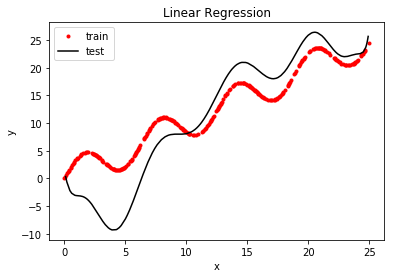

In [6]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()